# task e

Only thing that changes is the matrix. Two submatricies (block form) one for each subnet. We still assume them to be periodic.
Use random intial state

In [15]:
from tools import simulate, inital_state_random, generate_matrix_disjoint
import matplotlib.pyplot as plt
import numpy as np

# nicer looking default plots (according to your github)
plt.style.use('bmh')

In [16]:
# Parameter
sub_nodes = [11,10]
connections = [-2,-1,1,2] 
steps = 100

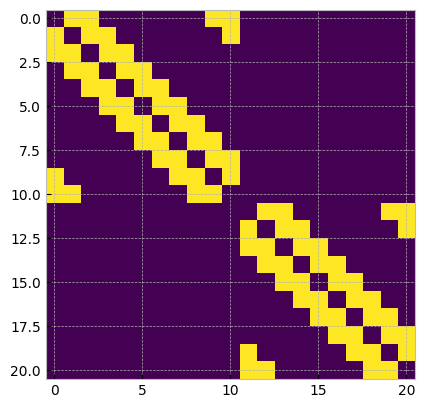

In [17]:
# generate matrix 
t_matrix = generate_matrix_disjoint(sub_nodes,connections)
plt.imshow(t_matrix)
plt.show()

In [18]:
# generate inital state
inital_state_random = inital_state_random(nodes = sum(sub_nodes))

In [19]:
# simulate
time_dev = simulate(t_matrix,inital_state_random,steps)

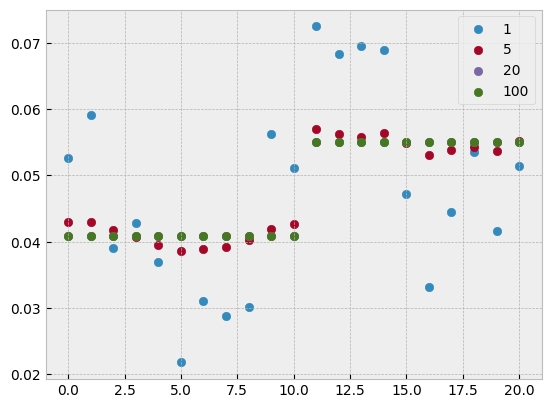

In [20]:
i_step = [1,5,20,100]
x = list(range(sum(sub_nodes)))
for i in i_step:
    plt.scatter(x,time_dev[i],label=i)
plt.legend()
plt.show()

[-5.59016994e-01 -5.59016994e-01 -5.50903906e-01 -5.50903906e-01
 -3.98587786e-01 -3.98587786e-01 -2.50000000e-01 -2.50000000e-01
 -2.50000000e-01 -2.50000000e-01 -1.19722860e-01 -1.19722860e-01
 -5.91197204e-02 -5.91197204e-02  3.50667296e-16  5.59016994e-01
  5.59016994e-01  6.28334273e-01  6.28334273e-01  1.00000000e+00
  1.00000000e+00]
[[ 0.00000000e+00  0.00000000e+00 -4.26401422e-01  9.68552387e-05
   1.22068346e-01 -4.08555383e-01  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00 -7.97754236e-03  4.26326800e-01
   2.11550393e-02  4.25876327e-01  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -4.24620644e-01 -3.89292995e-02 -3.01511345e-01
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  6.07791188e-02  4.22047486e-01
  -3.88703323e-01  1.75293777e-01  0.00000000e+00  0.00000000e+00
  -0.00000000e+00  0.00000000e+00 -3.91114489e-01  1.69845926e-01
   9.96851150e-02 -4.14585407e-01  0.00000000e+00  0.00000000e+00
  -0.00000000e+00 -3.78260385e-01  1.9681784

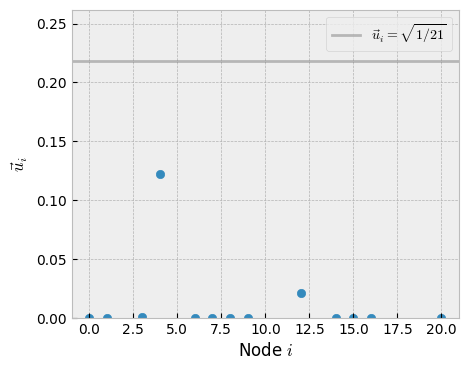

In [25]:
# find eigenvalues 
eig_val_check, eig_vec_check = np.linalg.eigh(t_matrix)
print(eig_val_check)
print(eig_vec_check)
            
x = list(range(21))
plt.figure(figsize=(5,4))
for vec in eig_vec_check:   
    plt.plot(x,vec)
    

plt.xlabel("Node $i$")
plt.ylabel("$\\vec{u}_i$")
plt.ylim(0, 1.2*np.sqrt(1/21))
plt.axhline(np.sqrt(1/21),label="$ \\vec{u}_i = \\sqrt{1/21}$",color="grey",alpha=0.5)
plt.legend()

#plt.savefig(f"images/eigenvector_1.pdf")
# We have two with eig val 1, one for each side of the system
# die dazugehörigen eigenvectoren sind jeweils für das linke oder rechte netz
# 
# man könnte es leichter machen in dem man die gitter getrennt löste dann würde man die nullstellen am rand vernachlässigen können